# Install libraries

In [1]:
!pip3 install pandas -U
!pip3 install xlrd -U
!pip3 install openpyxl -U
!pip3 install jinja2 -U
!pip3 install https://github.com/ydataai/pandas-profiling/archive/master.zip
!pip install imbalanced-learn -U


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip (21.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import libraries

In [2]:
# Standard libraries

import pandas as pd
import numpy as np
import sys
import time

# Data exploratory library

import pandas_profiling as pp

# Machine learning libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Imbalance dataset libraries

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline

# Data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline controls

In [3]:
PROFILE_REPORT = False
STANDARDIZATION = True
PCA_EXPLAINED_VARIANCE_RATIO = False
APPLY_PCA = True

#####################################################

OVERSAMPLING = False
UNDERSAMPLING = False

# if OVERSAMPLING == True ----> Choose between 'RANDOM_OVERSAMPLING' and 'SMOTE'
# if UNDERSAMPLING == True ----> Choose between 'RANDOM_UNDERSAMPLING' and 'CLUSTER_CENTROIDS'

resampling_strategy = 'CLUSTER_CENTROIDS'

#####################################################

ALGORITHM = 'SVM' # 'KNN', 'DecisionTree', 'RandomForest', 'LogisticRegression', 'SVM'

In [4]:
# Start time
st = time.time()

# Import dataset

In [5]:
dry_beans_dataset_url = 'https://raw.githubusercontent.com/alessandrodesole/dry-bean-dataset-analysis/main/Dataset/Dry_Bean_Dataset.xlsx'

# Read dataset

dry_bean_df = pd.read_excel(dry_beans_dataset_url, sheet_name='Dry_Beans_Dataset')

# Check for missing values

n_missing_values = dry_bean_df.isnull().sum()
print("Null values for each feature:\n")
print(n_missing_values)

# Check for duplicate rows (and dropping)

n_duplicate_rows = dry_bean_df.duplicated().sum()
print("\nThere are " + str(n_duplicate_rows) + " duplicate rows\n")

print("Class distribution on duplicate rows\n")
class_distribution_duplicate_rows = dry_bean_df.loc[dry_bean_df.duplicated(), :]['Class'].value_counts()
print(class_distribution_duplicate_rows)

# Delete duplicate rows

dry_bean_df.drop_duplicates(inplace=True, ignore_index=True)

# Show first 10 entries of dry bean dataframe

dry_bean_df.head(10)

Null values for each feature:

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There are 68 duplicate rows

Class distribution on duplicate rows

HOROZ    68
Name: Class, dtype: int64


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


# Exploratory data analysis

In [6]:
# Compute statistics on dataset

if PROFILE_REPORT:

    dry_bean_profile = pp.ProfileReport(dry_bean_df, title="Dry Beans Dataset Profiling Report", explorative=True)
    dry_bean_profile.to_file("Dry_Bean_Report.html")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'DERMASON'),
  Text(1, 0, 'SIRA'),
  Text(2, 0, 'SEKER'),
  Text(3, 0, 'HOROZ'),
  Text(4, 0, 'CALI'),
  Text(5, 0, 'BARBUNYA'),
  Text(6, 0, 'BOMBAY')])

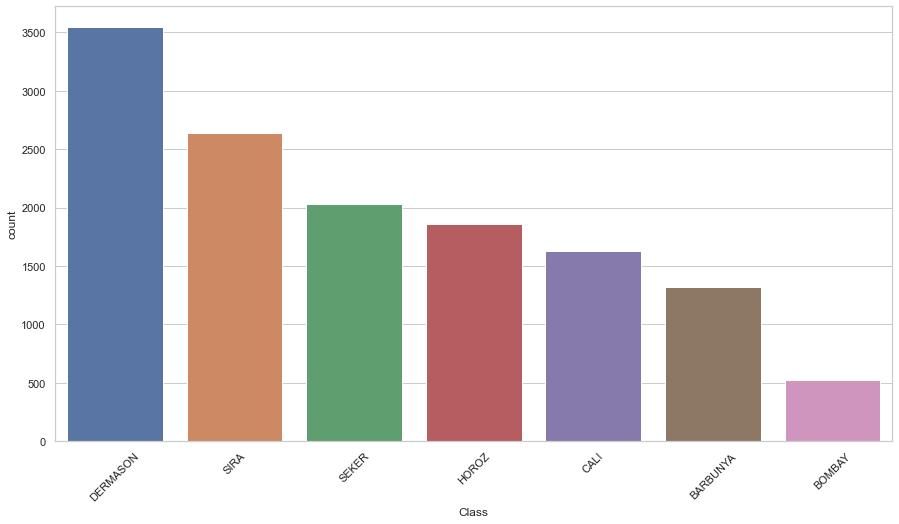

In [7]:
# Display countplot for Class column

sns.set_theme(style="whitegrid")

plt.figure(figsize=(15,8))
large_to_small = dry_bean_df.groupby('Class').size().sort_values().index[::-1]
sns.countplot(x="Class", order=large_to_small, data=dry_bean_df)
plt.xticks(rotation=45)

In [8]:
# Create class dictionary

class_dict = dict() 
for index,value in enumerate(large_to_small):
  class_dict[value] = index

print(class_dict)


{'DERMASON': 0, 'SIRA': 1, 'SEKER': 2, 'HOROZ': 3, 'CALI': 4, 'BARBUNYA': 5, 'BOMBAY': 6}


In [9]:
# Compute statistics

dry_bean_features = pd.Categorical(dry_bean_df.Class)#.codes
dry_bean_df_only_features = dry_bean_df.drop("Class", axis = 1)
feature_names = dry_bean_df_only_features.columns

dry_bean_features

['SEKER', 'SEKER', 'SEKER', 'SEKER', 'SEKER', ..., 'DERMASON', 'DERMASON', 'DERMASON', 'DERMASON', 'DERMASON']
Length: 13543
Categories (7, object): ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [10]:
dry_bean_df_only_features

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

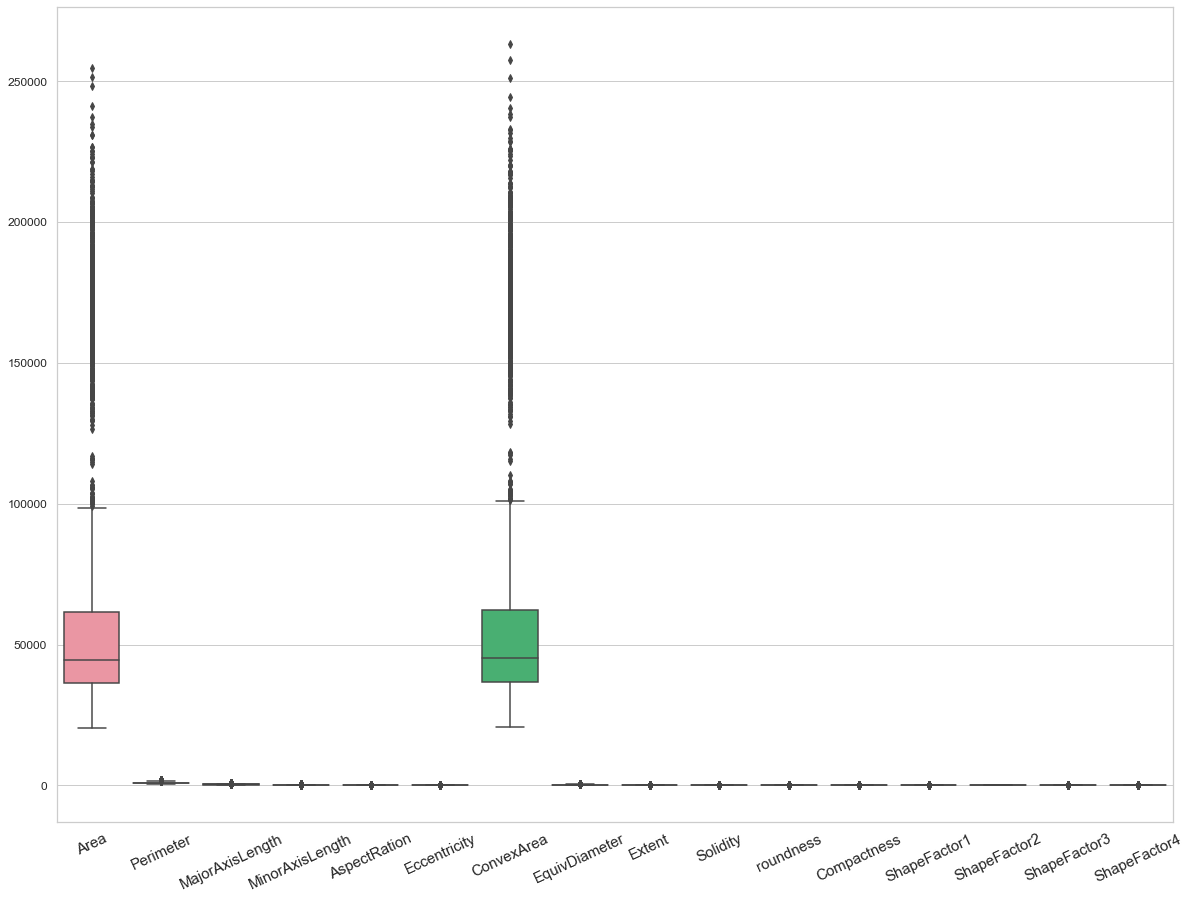

In [11]:
# Boxplots (without feature scaling)

fig_no_standardized =plt.figure(1, figsize=(20,15))
sns.boxplot(data = dry_bean_df_only_features)
plt.xticks(rotation=25, fontsize=15) 
plt.yticks(fontsize = 12)


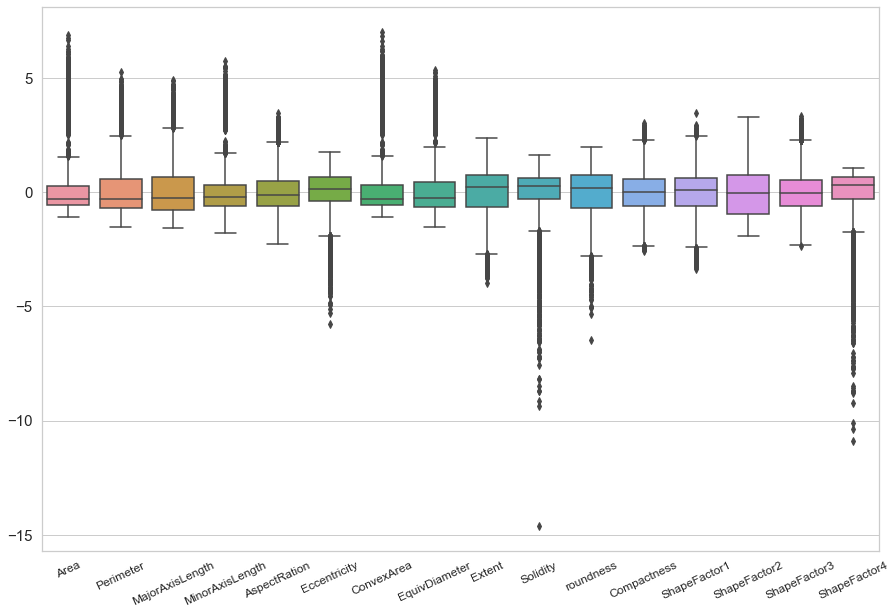

In [12]:
# Boxplots (with feature scaling)

SCALER_FLAG = 'Standardization' # Choose between 'Standardization' and 'MinMax'

if SCALER_FLAG == 'MinMax':
    scaler = MinMaxScaler()
elif SCALER_FLAG == 'Standardization':
    scaler = StandardScaler()
else:
    sys.exit('Error: Invalid scaler')
    
dry_bean_df_scaled = scaler.fit_transform(dry_bean_df_only_features)

fig=plt.figure(1, figsize=(20,15))
fig.set_size_inches(15, 10)
ax=fig.add_subplot(111)
sns.boxplot(data=dry_bean_df_scaled[:,:], orient='v')
plt.xticks(np.arange(0,len(feature_names)), labels = feature_names, rotation=25, fontsize=12)  
plt.yticks(fontsize=15)

plt.show()

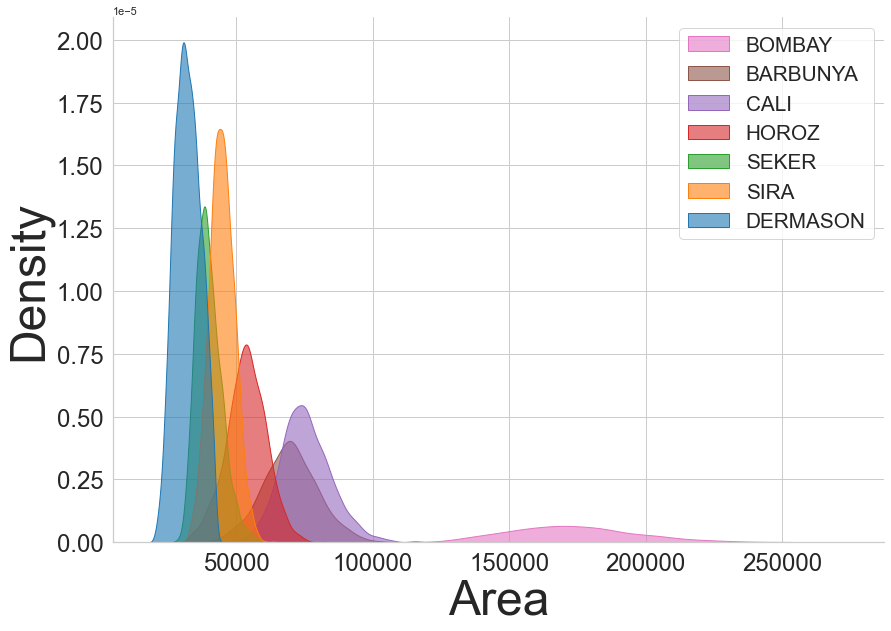

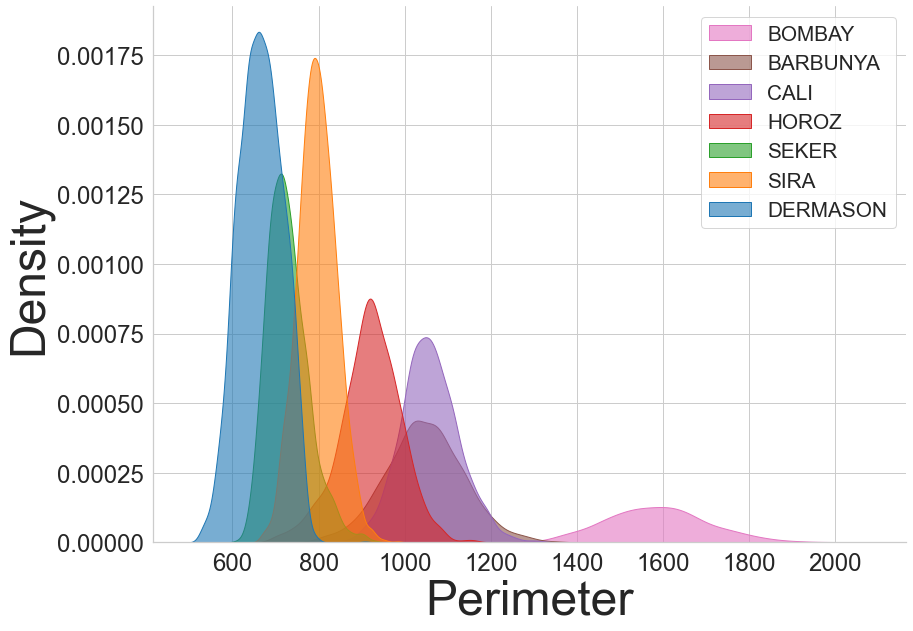

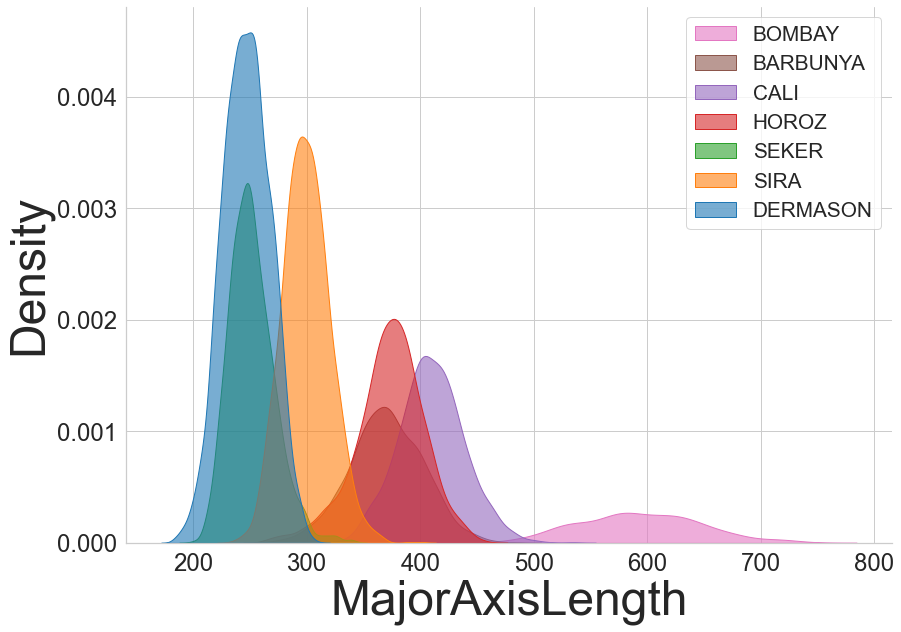

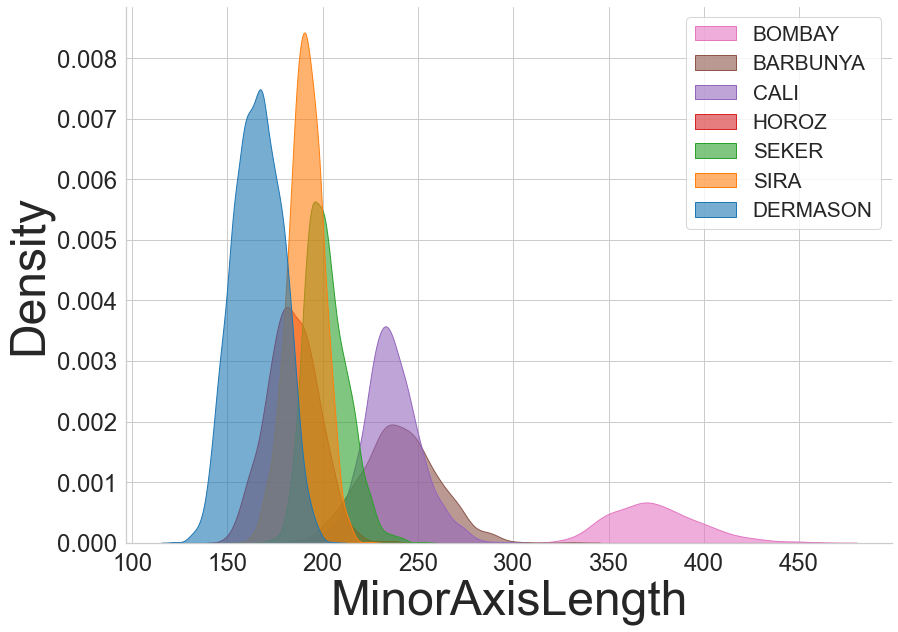

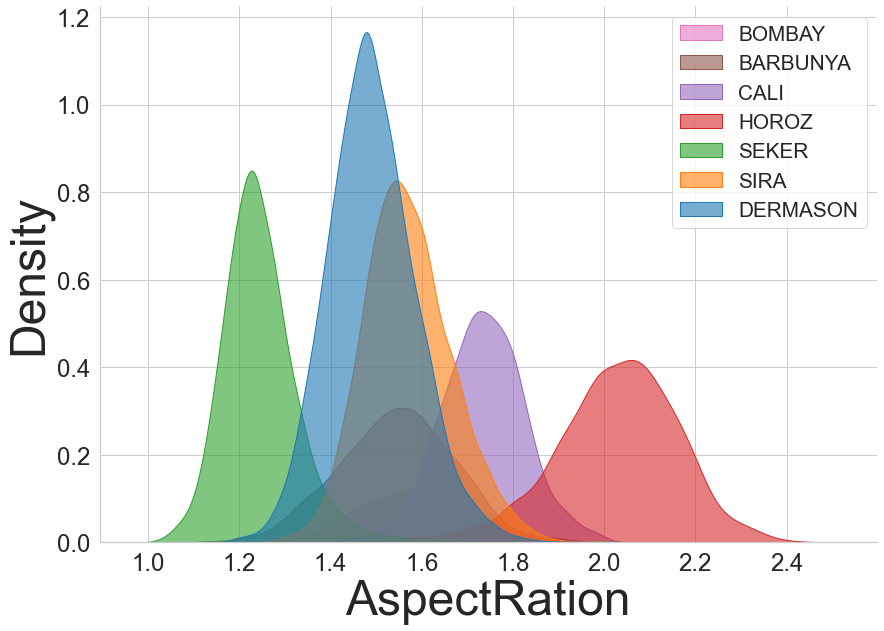

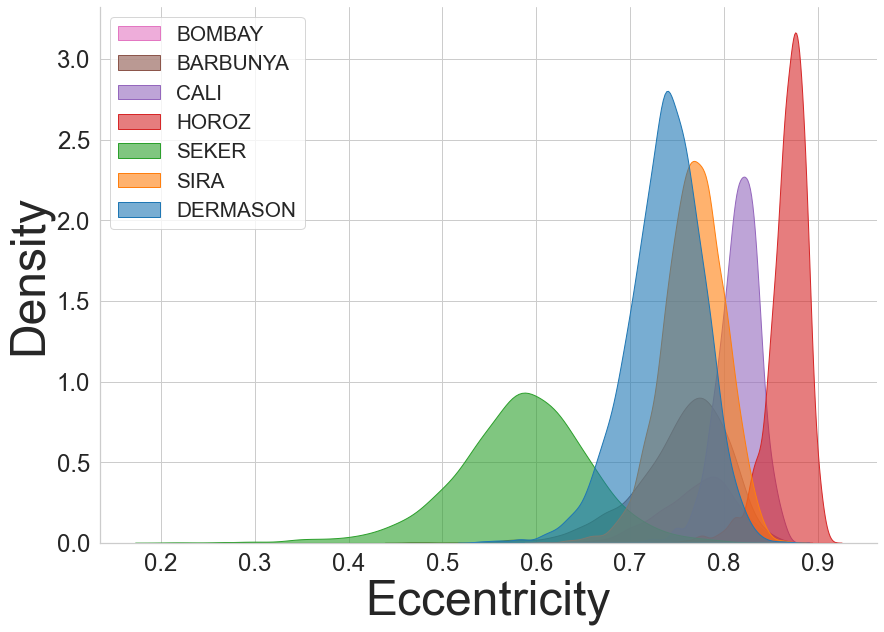

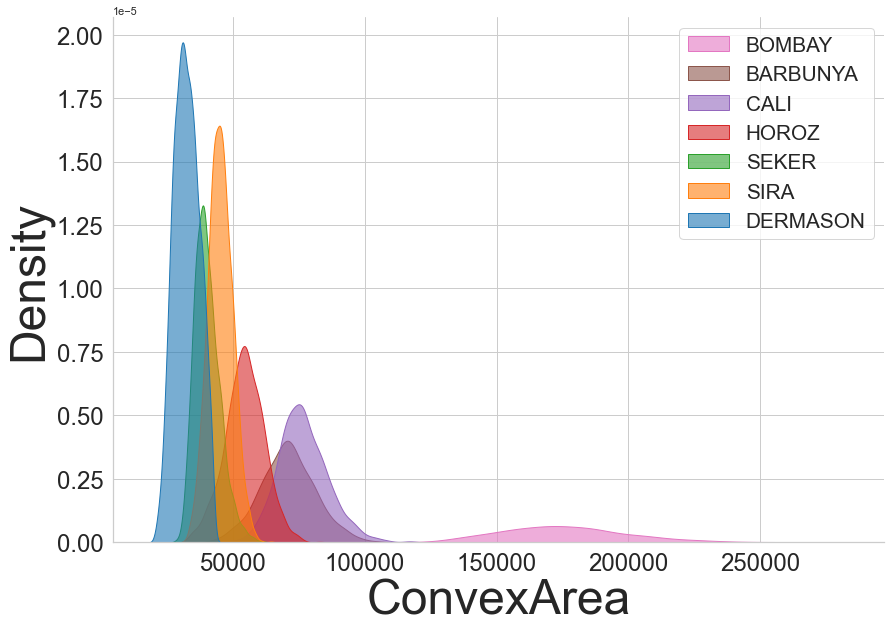

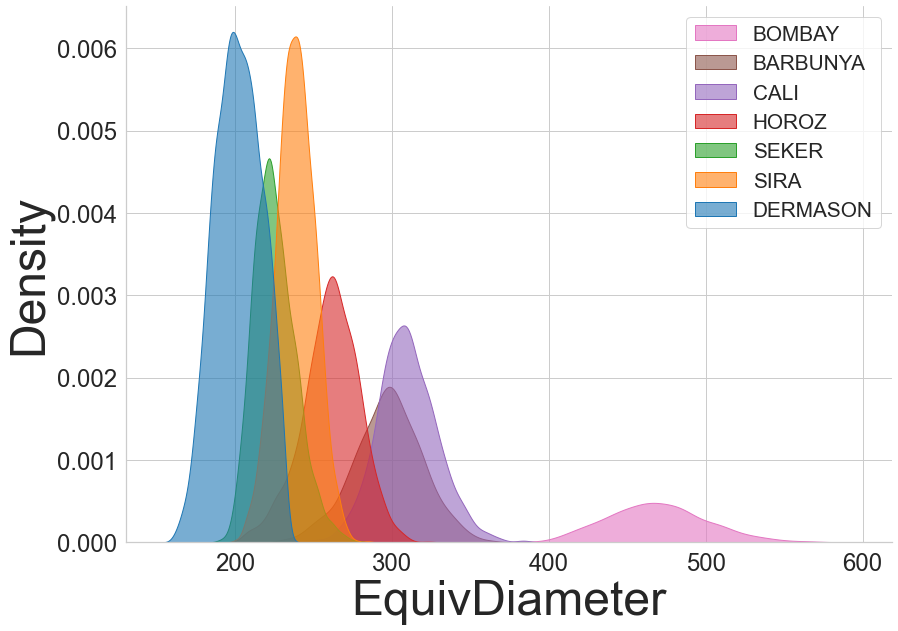

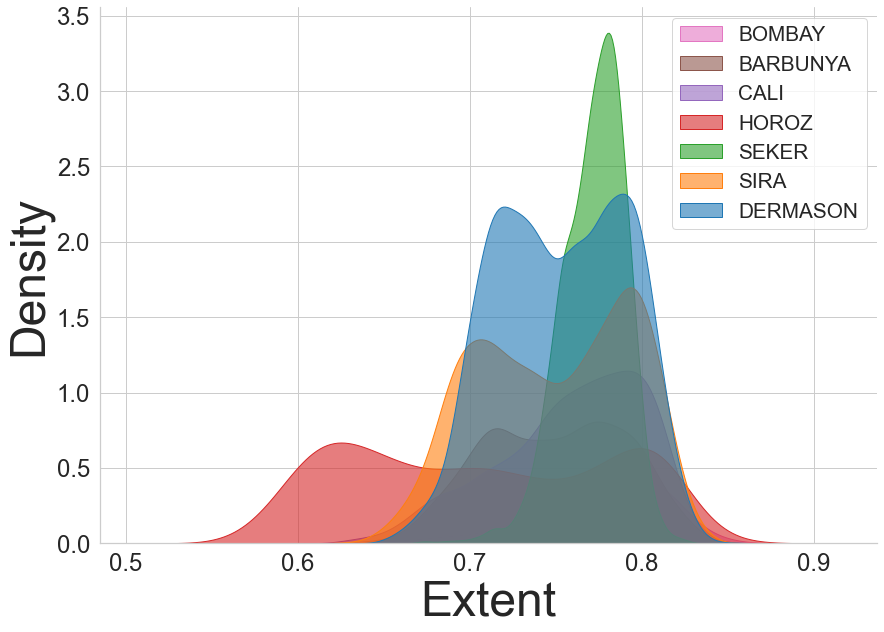

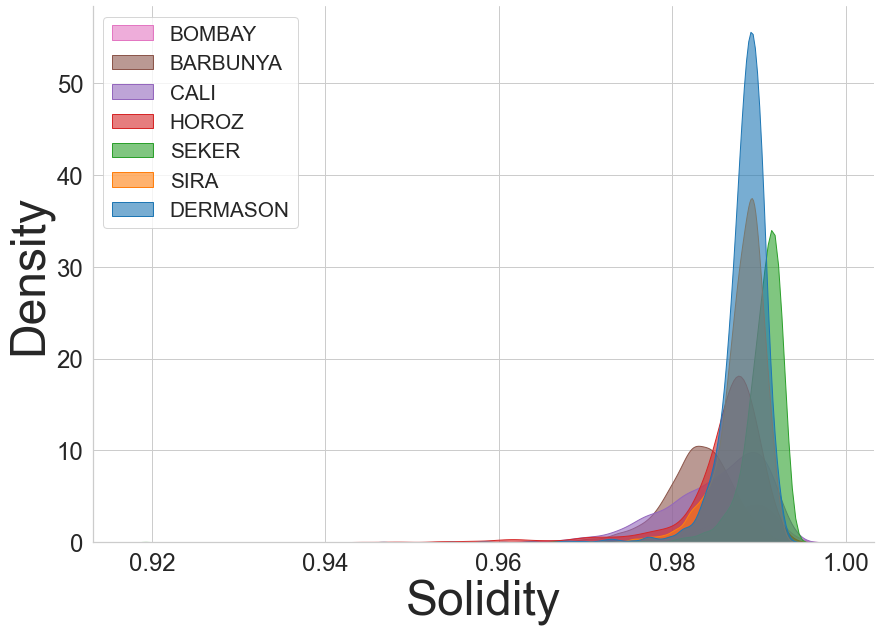

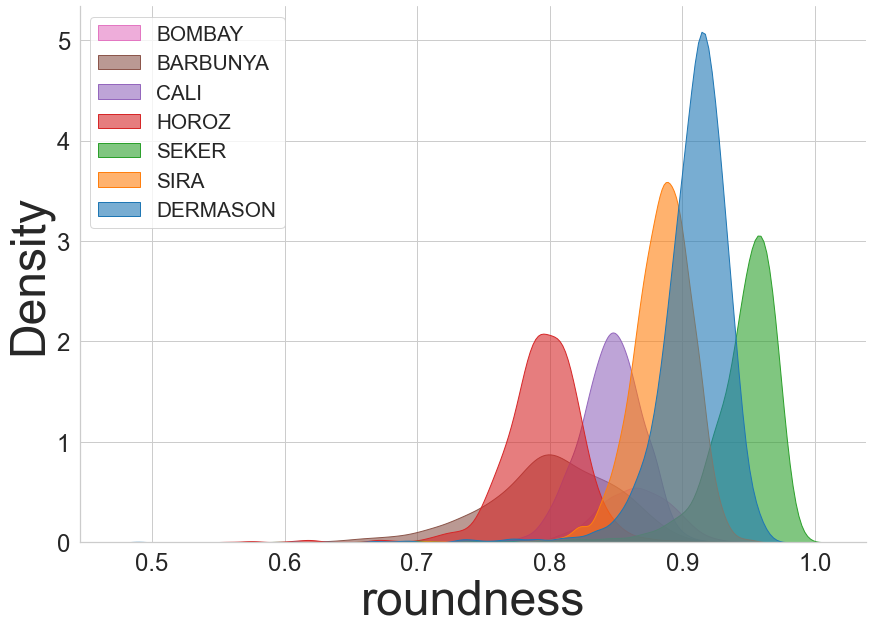

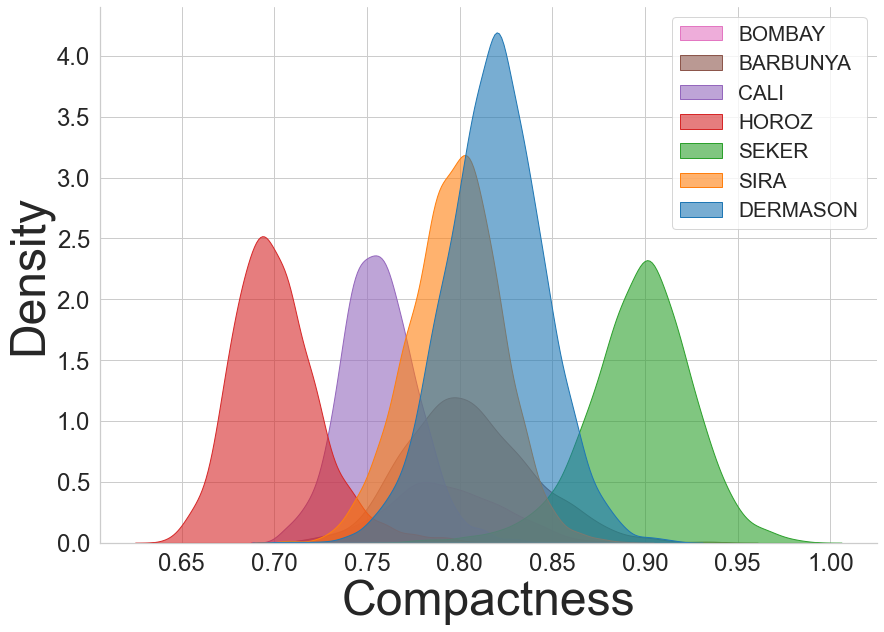

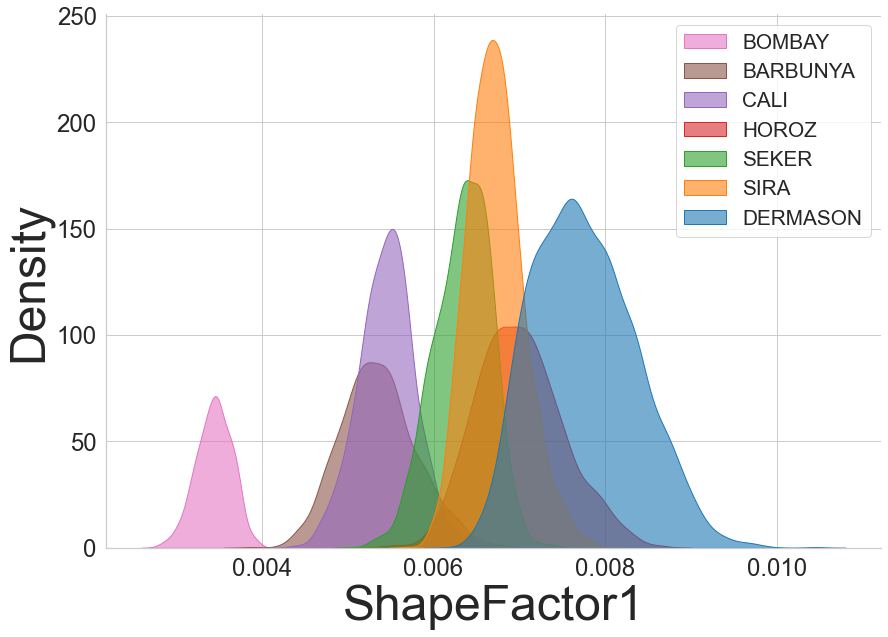

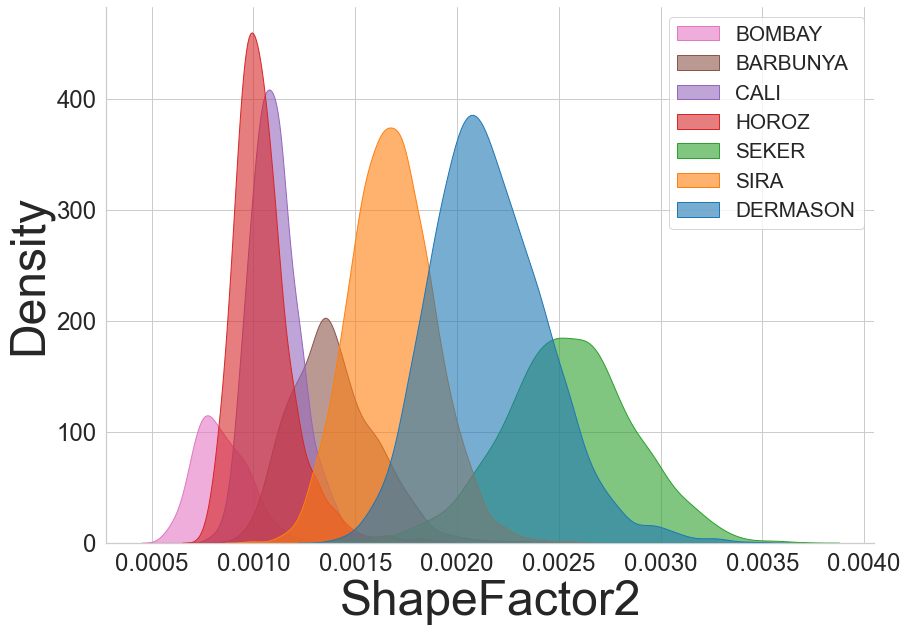

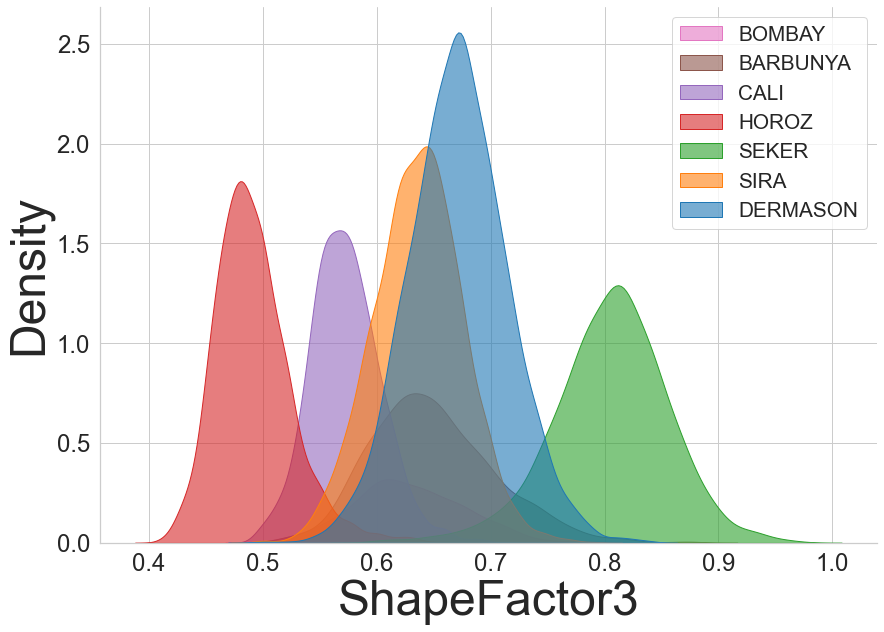

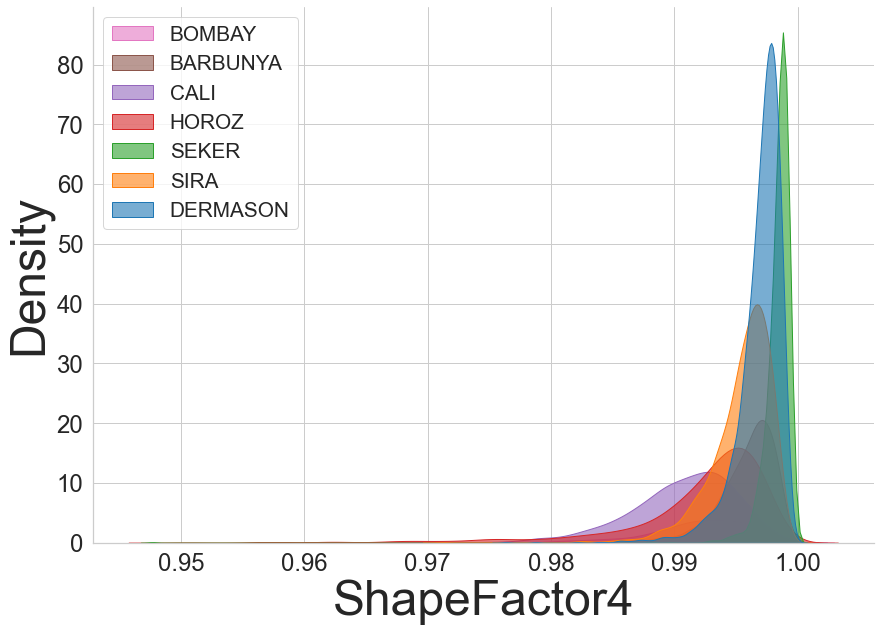

In [13]:
# Add a column with labels code

dry_bean_df_labels = pd.DataFrame(dry_bean_df_only_features)
dry_bean_df_labels['Labels'] = dry_bean_df['Class'].map(class_dict)

# Declare the hue order in dataset

h_o = list(class_dict.keys())
h_o.reverse()

# KDE plots

palette = "tab10"
for i in range(16):
    sns.displot(dry_bean_df_labels, x=dry_bean_df_labels.columns.values[i], hue="Labels",
            kind="kde", fill=True, palette=palette, legend = False, alpha = 0.6, height=8.27, aspect=11.7/8.27)
    if i == 5 or i == 9 or i == 10 or i == 15:
        plt.legend(h_o, fontsize='xx-large', loc=2)
    else:
        plt.legend(h_o, fontsize='xx-large')
    plt.xlabel(dry_bean_df_labels.columns.values[i], fontsize=48)
    plt.ylabel('Density', fontsize=48)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

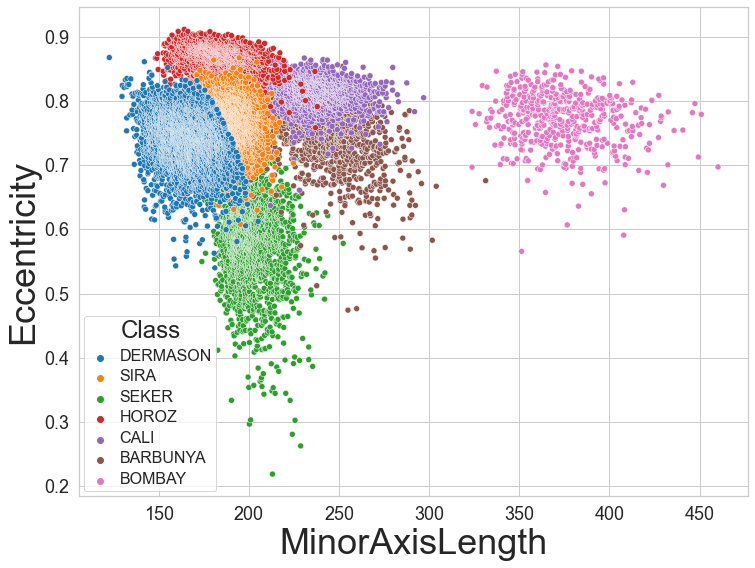

In [14]:
# Scatter plot correlated (or non-correlated) features

# Choose features

first = 'MinorAxisLength'
second = 'Eccentricity'

h_o = list(class_dict.keys())

fig, ax = plt.subplots(figsize = (12,9))
sns.scatterplot(data=dry_bean_df, x=first, y=second, hue="Class", hue_order=h_o, legend=True, palette=palette)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='24') # for legend title

plt.xlabel(first, fontsize=36)
plt.ylabel(second, fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show

# Data preprocessing

In [15]:
# Categorical data encoding

# 0 - Dermason
# 1 - Sira
# 2 - Seker
# 3 - Horoz
# 4 - Cali
# 5 - Barbunya
# 6 - Bombay

class_dict

{'DERMASON': 0,
 'SIRA': 1,
 'SEKER': 2,
 'HOROZ': 3,
 'CALI': 4,
 'BARBUNYA': 5,
 'BOMBAY': 6}

In [16]:
# Dry bean dataframe with encoded classes (labels)

dry_bean_df_labels

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Labels
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,0
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,0
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,0
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,0


In [17]:
# Train-Test split

features = dry_bean_df_labels.drop(['Labels'], axis=1)
labels = dry_bean_df_labels['Labels']

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25, random_state=7, stratify=labels)

In [18]:
# Statistics on Train and Test set

print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" Dermason samples: {len(Y_train[Y_train==0])}")
print(f" Sira samples:\t {len(Y_train[Y_train==1])}")
print(f" Seker samples:\t {len(Y_train[Y_train==2])}")
print(f" Horoz samples:\t {len(Y_train[Y_train==3])}")
print(f" Cali samples:\t {len(Y_train[Y_train==4])}")
print(f" Barbunya samples:\t {len(Y_train[Y_train==5])}")
print(f" Bombay samples:\t {len(Y_train[Y_train==6])}")

print("Test set:")
print(f" Dermason samples: {len(Y_test[Y_test==0])}")
print(f" Sira samples:\t {len(Y_test[Y_test==1])}")
print(f" Seker samples:\t {len(Y_test[Y_test==2])}")
print(f" Horoz samples:\t {len(Y_test[Y_test==3])}")
print(f" Cali samples:\t {len(Y_test[Y_test==4])}")
print(f" Barbunya samples:\t {len(Y_test[Y_test==5])}")
print(f" Bombay samples:\t {len(Y_test[Y_test==6])}")

(10157, 16)
(3386, 16)
Training set:
 Dermason samples: 2659
 Sira samples:	 1977
 Seker samples:	 1520
 Horoz samples:	 1395
 Cali samples:	 1222
 Barbunya samples:	 992
 Bombay samples:	 392
Test set:
 Dermason samples: 887
 Sira samples:	 659
 Seker samples:	 507
 Horoz samples:	 465
 Cali samples:	 408
 Barbunya samples:	 330
 Bombay samples:	 130


In [19]:
# Feature selection

corr_val_df = features.corr(method='pearson')

for i in range(0, corr_val_df.shape[0]):
    for j in range(0, corr_val_df.shape[1]):
        if corr_val_df.iloc[i][j] > 0.90 and list(corr_val_df)[i]!=list(corr_val_df)[j]:
            print("Features 1: " + list(corr_val_df)[i])
            print("Features 2: " + list(corr_val_df)[j])
            print(corr_val_df.iloc[i][j])
            print("\n*********\n")
            
# Features deleted = ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter', 'ConvexArea', 'ShapeFactor3']

features = features.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter', 'ConvexArea', 'ShapeFactor3'], axis=1)

Features 1: Area
Features 2: Perimeter
0.9669077355644935

*********

Features 1: Area
Features 2: MajorAxisLength
0.932622942564994

*********

Features 1: Area
Features 2: MinorAxisLength
0.9520409498940151

*********

Features 1: Area
Features 2: ConvexArea
0.9999396020129335

*********

Features 1: Area
Features 2: EquivDiameter
0.9849979740522397

*********

Features 1: Perimeter
Features 2: Area
0.9669077355644935

*********

Features 1: Perimeter
Features 2: MajorAxisLength
0.977560723016424

*********

Features 1: Perimeter
Features 2: MinorAxisLength
0.9143359154550065

*********

Features 1: Perimeter
Features 2: ConvexArea
0.9678709405577618

*********

Features 1: Perimeter
Features 2: EquivDiameter
0.991452663964702

*********

Features 1: MajorAxisLength
Features 2: Area
0.932622942564994

*********

Features 1: MajorAxisLength
Features 2: Perimeter
0.977560723016424

*********

Features 1: MajorAxisLength
Features 2: ConvexArea
0.9333921554683163

*********

Features 1: 

In [20]:
X_train = X_train.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter', 'ConvexArea', 'ShapeFactor3'], axis=1)
X_test = X_test.drop(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter', 'ConvexArea', 'ShapeFactor3'], axis=1)

In [21]:
# Standardization
if STANDARDIZATION:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

In [22]:
# Principal Component Analysis (Explained variance ratio analysis)

if PCA_EXPLAINED_VARIANCE_RATIO:
    pca = PCA(n_components=9, random_state=23)
    X_train_pca = pca.fit_transform(X_train_scaled)


    print(X_train_pca.shape)
    var_exp=pca.explained_variance_ratio_ 
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

    X_test_pca = pca.transform(X_test_scaled)

    # plot explained variances


    fig=plt.figure(1, figsize=(10,8))
    plt.bar(range(0,len(var_exp)), height=var_exp, alpha=0.7, align='center', color = 'chocolate')
    plt.plot(range(0,len(var_exp)), cum_var_exp, marker='o',  label='Cumulative explained variance',color = 'saddlebrown' )
    plt.ylabel('Explained variance ratio', fontsize= 14)
    plt.xlabel('Principal component index', fontsize=14)
    plt.xticks( range(0,len(var_exp)), range(1,(len(var_exp)+1)))
    plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [23]:
# Principal Component Analysis application

if APPLY_PCA:
    
    pca = PCA(n_components=7, random_state=14)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    X_train_pca = pd.DataFrame(X_train_pca)
    X_test_pca = pd.DataFrame(X_test_pca)
    X_train_pca.columns = ['PC' + str(i) for i in range(1, 8) ]
    X_test_pca.columns = ['PC' + str(i) for i in range(1, 8) ]
      

In [24]:
# Dataset Balancing

if OVERSAMPLING:
    # define oversampling strategy
    if resampling_strategy == 'RANDOM_OVERSAMPLING':
        oversample = RandomOverSampler(random_state=21)
    elif resampling_strategy == 'SMOTE':
        oversample = SMOTE(random_state=28)
        
    #X_train, Y_train = oversample.fit_resample(X_train, Y_train)
        
if UNDERSAMPLING:
    # define oversampling strategy
    if resampling_strategy == 'RANDOM_UNDERSAMPLING':
        undersample = RandomUnderSampler(random_state=35)
    elif resampling_strategy == 'CLUSTER_CENTROIDS':
        undersample = ClusterCentroids(random_state=42)
        
    #X_train, Y_train = undersample.fit_resample(X_train, Y_train)

# 5. Classification algorithms

In [25]:
# TRAIN AND VALIDATION
# Stratified K-Fold Cross Validation

# Pipeline
if ALGORITHM == 'SVM' : 
    # Support Vector Machine (SVM) classifier
    parameter_grid = {
        'C': [100, 10, 1, 0.1, 0.001, 0.0001],
        'kernel': ['rbf', 'poly', 'linear'],
        'gamma': [0.0001, 0.001, 0.01],
        'decision_function_shape' : ['ovo']
    }
    clf_name = 'svc__'
    classifier = SVC()

elif ALGORITHM == 'DecisionTree':
    # Decision Tree classifier
    parameter_grid = {
        "criterion":["gini", "entropy"],
        "max_features":[None, "auto", "sqrt", "log2"],
        "class_weight":[None, "balanced"],
        "max_depth":[None, 5, 10, 20, 25]
        
    }
    clf_name = 'decisiontreeclassifier__'
    classifier = DecisionTreeClassifier()
    
elif ALGORITHM == 'RandomForest':
    # Random Forest classifier
    parameter_grid = {
        "criterion":["gini", "entropy"],
        "max_features":[None, "sqrt"],
        #"oob_score":[True],
        "n_estimators":[10, 50, 80, 100, 120],
        "max_depth": [None]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
    
elif ALGORITHM == 'LogisticRegression':
    # Logistic Regression classifier
    parameter_grid = {
        "multi_class":['multinomial'],
        "solver":['lbfgs'],
        "C":[0.0001, 0.001, 0.01, 0.1, 1, 10],
        "max_iter":[500]
    }
    clf_name = 'logisticregression__'
    classifier = LogisticRegression()
    
elif ALGORITHM == 'KNN':
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors":[8, 10, 15, 20, 30, 50],
        "weights":["uniform", "distance"],
        "p":[1,2]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else :
    raise RuntimeError("Error: please check classifier name");
    

new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}
kf = StratifiedKFold(n_splits=5, random_state=49, shuffle=True)

In [26]:
scaler = StandardScaler()
pca = PCA(n_components=7, random_state=14)


if APPLY_PCA:
    if OVERSAMPLING:
        pipeline = make_pipeline(scaler, pca, oversample, classifier)
    elif UNDERSAMPLING:
        pipeline = make_pipeline(scaler, pca, undersample, classifier)
    else:
        pipeline = make_pipeline(scaler, pca, classifier)
else:
    if OVERSAMPLING:
        pipeline = make_pipeline(scaler, oversample, classifier)
    elif UNDERSAMPLING:
        pipeline = make_pipeline(scaler, undersample, classifier)
    else:
        pipeline = make_pipeline(scaler, classifier)
        
scoring = {'accuracy': make_scorer(accuracy_score),
           'macro_prec': make_scorer(precision_score, average='macro'),
           'macro_recall': make_scorer(recall_score, average='macro'),
           'macro_f1': make_scorer(f1_score, average='macro'),
           'micro_prec': make_scorer(precision_score, average='micro'),
           'micro_recall': make_scorer(recall_score, average='micro'),
           'micro_f1': make_scorer(f1_score, average='micro'),
           'weighted_prec': make_scorer(precision_score, average='weighted'),
           'weighted_recall': make_scorer(recall_score, average='weighted'),
           'weighted_f1': make_scorer(f1_score, average='weighted')
          }

grid_search = GridSearchCV(pipeline, param_grid=new_params, cv=kf, scoring=scoring, refit='weighted_f1', return_train_score=True)

grid_search.fit(X_train, Y_train)

print(f"Best configuration found for {classifier}:")
print(grid_search.best_params_)
print(f"Val {scoring}:   {grid_search.best_score_}")

#print(classification_report(y_test, y_pred)) #  target_names=labels

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alede\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

Best configuration found for SVC():
{'svc__C': 100, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Val {'accuracy': make_scorer(accuracy_score), 'macro_prec': make_scorer(precision_score, average=macro), 'macro_recall': make_scorer(recall_score, average=macro), 'macro_f1': make_scorer(f1_score, average=macro), 'micro_prec': make_scorer(precision_score, average=micro), 'micro_recall': make_scorer(recall_score, average=micro), 'micro_f1': make_scorer(f1_score, average=micro), 'weighted_prec': make_scorer(precision_score, average=weighted), 'weighted_recall': make_scorer(recall_score, average=weighted), 'weighted_f1': make_scorer(f1_score, average=weighted)}:   0.9306596776567364


In [27]:
Y_pred = grid_search.predict(X_test)
report = classification_report(Y_test, Y_pred)

accuracy=accuracy_score(Y_test, Y_pred)
macro_prec=precision_score(Y_test, Y_pred, average='macro')
macro_recall=recall_score(Y_test, Y_pred, average='macro')
macro_f1=f1_score(Y_test, Y_pred, average='macro')
micro_prec=precision_score(Y_test, Y_pred, average='micro')
micro_recall=recall_score(Y_test, Y_pred, average='micro')
micro_f1=f1_score(Y_test, Y_pred, average='micro')
weighted_prec=precision_score(Y_test, Y_pred, average='weighted')
weighted_recall=recall_score(Y_test, Y_pred, average='weighted')
weighted_f1=f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Macro-Precision: ",macro_prec)
print("Macro-Recall: ",macro_recall)
print("Macro F1: ",macro_f1)
print("Micro-Precision: ",micro_prec)
print("Micro-Recall: ",micro_recall)
print("Micro F1: ",micro_f1)
print("Weighted-Precision: ", weighted_prec)
print("Weighted-Recall: ",weighted_recall)
print("Weighted F1: ",weighted_f1)
print(f"")

print(report)

Accuracy:  0.9297105729474306
Macro-Precision:  0.9418268503970488
Macro-Recall:  0.9384427198774355
Macro F1:  0.9399763996393302
Micro-Precision:  0.9297105729474306
Micro-Recall:  0.9297105729474306
Micro F1:  0.9297105729474306
Weighted-Precision:  0.9301175226286298
Weighted-Recall:  0.9297105729474306
Weighted F1:  0.9297887629408705

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       887
           1       0.87      0.89      0.88       659
           2       0.96      0.97      0.96       507
           3       0.95      0.95      0.95       465
           4       0.93      0.93      0.93       408
           5       0.96      0.90      0.93       330
           6       1.00      1.00      1.00       130

    accuracy                           0.93      3386
   macro avg       0.94      0.94      0.94      3386
weighted avg       0.93      0.93      0.93      3386



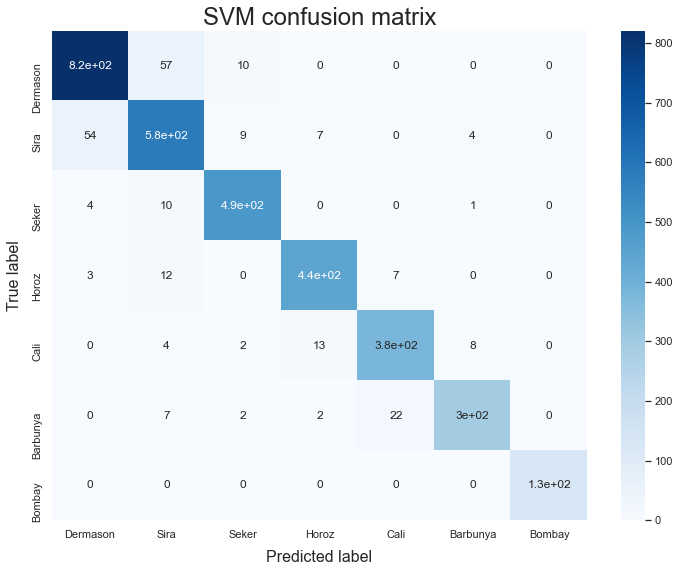

In [32]:
#Get the confusion matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(12,9))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=['Dermason','Sira','Seker','Horoz','Cali', 'Barbunya', 'Bombay'], yticklabels=['Dermason','Sira','Seker','Horoz','Cali', 'Barbunya', 'Bombay'])
plt.title("SVM confusion matrix", fontsize=24)
plt.xlabel('Predicted label', labelpad=10, fontsize=16)
plt.ylabel('True label', labelpad=10, fontsize=16)
plt.show()

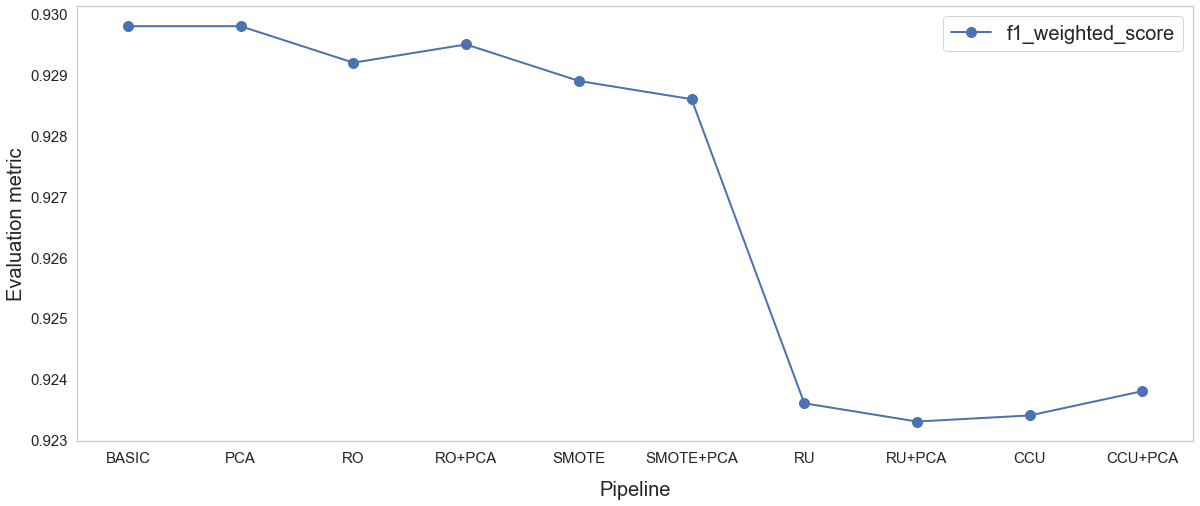

(0.9298,
 0.9298,
 0.9292,
 0.9295,
 0.9289,
 0.9286,
 0.9236,
 0.9233,
 0.9234,
 0.9238)

In [29]:
KNN_df = pd.DataFrame({
   "f1_weighted_score": [0.9298, 0.9298, 0.9292, 0.9295, 0.9289, 0.9286, 0.9236, 0.9233, 0.9234, 0.9238]
   }, index = ["BASIC", "PCA", "RO", "RO+PCA", "SMOTE", "SMOTE+PCA", "RU", "RU+PCA", "CCU", "CCU+PCA"])
#KNN_df.plot(kind='line')


f = plt.figure(figsize=(20,8))
plt.plot(KNN_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Pipeline",size=20,labelpad=15)
plt.ylabel("Evaluation metric",size=20)
#plt.ylim(0.9, 1)
plt.legend(KNN_df,prop={'size': 20})
plt.show()

0.9298, 0.9298, 0.9292, 0.9295, 0.9289, 0.9286, 0.9236, 0.9233, 0.9234, 0.9238

In [30]:
# get the end time
et = time.time()

# get the execution time
res = et - st

final_res = res / 60
print('Execution time:', final_res, 'minutes')

Execution time: 23.35394945939382 minutes


In [31]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)